1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

2 - Purchase Probability Model - Average Customer

In [2]:
df_pa = pd.read_csv("customer-segmented-prepared.csv")
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,3,0,0,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,3,0,0,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,3,0,0,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,3,0,0,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,3,0,0,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,3,0,0,0,1


In [3]:
Y = df_pa['Incidence']
Y

0        0
1        0
2        0
3        0
4        0
        ..
58688    0
58689    0
58690    0
58691    1
58692    0
Name: Incidence, Length: 58693, dtype: int64

In [4]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                    df_pa['Price_2'] +
                    df_pa['Price_3'] +
                    df_pa['Price_4'] +
                    df_pa['Price_5']) / 5
X

,Mean_Price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030
...,...
58688,2.060
58689,2.060
58690,2.086
58691,2.092


In [5]:
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [6]:
print(model_purchase.coef_)
print(model_purchase.intercept_)

[[-2.34895197]]
[3.58770052]


In [7]:
feature_name = X.columns.values
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficient'] = np.transpose(model_purchase.coef_)
intercept = pd.DataFrame(columns=['Feature Name'], data=["Bias"])
intercept["Coefficient"] = model_purchase.intercept_
summary_table = pd.concat([summary_table, intercept])
summary_table = summary_table.reset_index(drop=True)
summary_table['Odds Ratio'] = np.exp(summary_table.Coefficient)
summary_table

,Feature Name,Coefficient,Odds Ratio
0,Mean_Price,-2.348952,0.095469
1,Bias,3.587701,36.150852


In [8]:
# log(Odd Ratio) = a1x1 + a2x2 + a3x3 ... + anxn + bias

3 - Price Elasticity of Purchase Probability

In [9]:
# % change in purchase probability with 1% change in price
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [10]:
# minimum price = 1.10
# maximum price = 2.80
# Therefore, lets check the price elasticity for prices between 0.5 to 3.5
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [11]:
df_price_range = pd.DataFrame(price_range, columns=['Mean_Price'])
df_price_range

,Mean_Price
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [12]:
Y_prob = model_purchase.predict_proba(df_price_range)
Y_prob

array([[0.0821698 , 0.9178302 ],
       [0.08395881, 0.91604119],
       [0.08578313, 0.91421687],
       [0.08764329, 0.91235671],
       [0.08953984, 0.91046016],
       [0.09147332, 0.90852668],
       [0.09344426, 0.90655574],
       [0.09545321, 0.90454679],
       [0.0975007 , 0.9024993 ],
       [0.09958727, 0.90041273],
       [0.10171347, 0.89828653],
       [0.10387983, 0.89612017],
       [0.10608687, 0.89391313],
       [0.10833514, 0.89166486],
       [0.11062516, 0.88937484],
       [0.11295745, 0.88704255],
       [0.11533254, 0.88466746],
       [0.11775094, 0.88224906],
       [0.12021316, 0.87978684],
       [0.1227197 , 0.8772803 ],
       [0.12527107, 0.87472893],
       [0.12786774, 0.87213226],
       [0.13051021, 0.86948979],
       [0.13319895, 0.86680105],
       [0.13593443, 0.86406557],
       [0.13871708, 0.86128292],
       [0.14154738, 0.85845262],
       [0.14442573, 0.85557427],
       [0.14735257, 0.85264743],
       [0.1503283 , 0.8496717 ],
       [0.

In [13]:
# Column 1 = prob of not purchasing
# Column 2 = prob of purchasing
purchase_prob = Y_prob[:, 1]
purchase_prob

array([0.9178302 , 0.91604119, 0.91421687, 0.91235671, 0.91046016,
       0.90852668, 0.90655574, 0.90454679, 0.9024993 , 0.90041273,
       0.89828653, 0.89612017, 0.89391313, 0.89166486, 0.88937484,
       0.88704255, 0.88466746, 0.88224906, 0.87978684, 0.8772803 ,
       0.87472893, 0.87213226, 0.86948979, 0.86680105, 0.86406557,
       0.86128292, 0.85845262, 0.85557427, 0.85264743, 0.8496717 ,
       0.84664668, 0.843572  , 0.84044729, 0.8372722 , 0.83404641,
       0.83076959, 0.82744146, 0.82406174, 0.82063017, 0.81714652,
       0.81361059, 0.81002217, 0.80638111, 0.80268726, 0.79894051,
       0.79514078, 0.79128799, 0.78738212, 0.78342316, 0.77941114,
       0.77534611, 0.77122815, 0.76705739, 0.76283397, 0.75855809,
       0.75422995, 0.74984981, 0.74541795, 0.74093471, 0.73640043,
       0.73181552, 0.7271804 , 0.72249555, 0.71776148, 0.71297873,
       0.70814789, 0.70326958, 0.69834446, 0.69337324, 0.68835665,
       0.68329548, 0.67819054, 0.67304268, 0.66785281, 0.66262

In [14]:
# Price Elasticity = (ΔPurchase_Prob/Purchase_Prob) * (Price/ΔPrice)
# Simplified Version => E = Price_Coefficient*Price*(1 - Purchase_Prob)
# If |E| < 1 => inelastic
# If |E| > 1 => elastic
price_elasticity = summary_table.Coefficient[0] * price_range * (1 - purchase_prob)
price_elasticity

array([-0.09650646, -0.10057976, -0.10478023, -0.10911104, -0.11357539,
       -0.11817654, -0.1229178 , -0.12780255, -0.13283419, -0.13801618,
       -0.14335204, -0.14884532, -0.15449964, -0.16031865, -0.16630604,
       -0.17246556, -0.17880099, -0.18531617, -0.19201495, -0.19890125,
       -0.205979  , -0.21325218, -0.2207248 , -0.2284009 , -0.23628454,
       -0.24437983, -0.25269087, -0.26122181, -0.26997681, -0.27896003,
       -0.28817566, -0.2976279 , -0.30732095, -0.31725902, -0.32744629,
       -0.33788699, -0.34858528, -0.35954536, -0.37077138, -0.38226749,
       -0.3940378 , -0.40608641, -0.41841736, -0.43103468, -0.44394234,
       -0.45714425, -0.47064431, -0.48444631, -0.49855402, -0.51297112,
       -0.52770121, -0.54274783, -0.55811442, -0.57380435, -0.58982087,
       -0.60616715, -0.62284623, -0.63986107, -0.65721448, -0.67490917,
       -0.69294771, -0.71133255, -0.73006597, -0.74915014, -0.76858706,
       -0.78837858, -0.80852639, -0.82903201, -0.84989681, -0.87

In [15]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns={0: "Mean Price"})
df_price_elasticities['Mean Price Elasticity'] = price_elasticity
df_price_elasticities

,Mean Price,Mean Price Elasticity
0,0.50,-0.096506
1,0.51,-0.100580
2,0.52,-0.104780
3,0.53,-0.109111
4,0.54,-0.113575
...,...,...
295,3.45,-8.016261
296,3.46,-8.041515
297,3.47,-8.066735
298,3.48,-8.091921


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

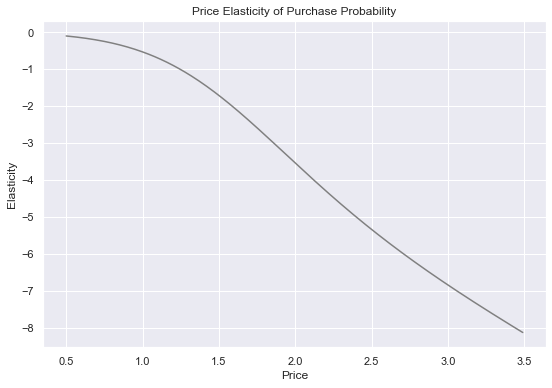

In [16]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, price_elasticity, color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

3 - Purchase Probability Model - By Customer Segment

In [17]:
df_price_elasticities_segment = pd.DataFrame()

In [18]:
for i in range(0, 4):
    seg_name = "Price Elasticity Segment " + str(i)
    df_pa_segment = df_pa[df_pa['Segment'] == i]
    Y = df_pa_segment['Incidence']
    X = pd.DataFrame()
    X['Mean_Price'] = (df_pa_segment['Price_1'] + df_pa_segment['Price_2'] + df_pa_segment['Price_3'] + df_pa_segment['Price_4'] + df_pa_segment['Price_5']) / 5 
    model_incidence_segment = LogisticRegression(solver='sag')
    model_incidence_segment.fit(X, Y)
    Y_segment = model_incidence_segment.predict_proba(df_price_range)
    purchase_pr_segment = Y_segment[:][:, 1]
    pe_segment = model_incidence_segment.coef_[:, 0] * price_range * (1 - purchase_pr_segment)
    df_price_elasticities_segment[seg_name] = pe_segment

In [19]:
df_price_elasticities_segment['Price Elasticity Unsegmented'] = price_elasticity

In [20]:
df_price_elasticities_segment

,Price Elasticity Segment 0,Price Elasticity Segment 1,Price Elasticity Segment 2,Price Elasticity Segment 3,Price Elasticity Unsegmented
0,-0.129796,-0.133186,-0.122206,-0.052951,-0.096506
1,-0.135146,-0.137487,-0.126633,-0.055677,-0.100580
2,-0.140656,-0.141867,-0.131165,-0.058520,-0.104780
3,-0.146327,-0.146328,-0.135804,-0.061483,-0.109111
4,-0.152164,-0.150870,-0.140551,-0.064570,-0.113575
...,...,...,...,...,...
295,-7.941884,-4.771631,-6.113867,-10.832728,-8.016261
296,-7.966432,-4.789385,-6.134788,-10.865021,-8.041515
297,-7.990955,-4.807112,-6.155673,-10.897291,-8.066735
298,-8.015452,-4.824810,-6.176522,-10.929539,-8.091921


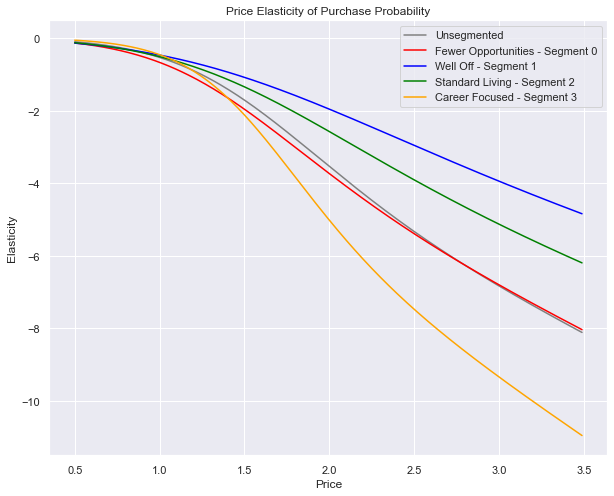

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(price_range,
        df_price_elasticities_segment['Price Elasticity Unsegmented'], color='grey', label='Unsegmented')
plt.plot(price_range,
        df_price_elasticities_segment['Price Elasticity Segment 0'], color='red', label='Fewer Opportunities - Segment 0')
plt.plot(price_range,
        df_price_elasticities_segment['Price Elasticity Segment 1'], color='blue', label='Well Off - Segment 1')
plt.plot(price_range,
        df_price_elasticities_segment['Price Elasticity Segment 2'], color='green', label='Standard Living - Segment 2')
plt.plot(price_range,
        df_price_elasticities_segment['Price Elasticity Segment 3'], color='orange', label='Career Focused - Segment 3')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()